<a href="https://colab.research.google.com/github/Faryal112/Faryal112/blob/main/Weather_Prediction_Model(Final_Year)02(data_stream-open.csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving data_stream-oper.csv to data_stream-oper.csv


In [4]:
import numpy as np
import pandas as pd

# Example: If you want the first 8 columns including the header
df = pd.read_csv("/content/data_stream-oper.csv", usecols=range(8))

# Example: if you need specific columns - say 3,5,6,7 (including header)
df = pd.read_csv("/content/data_stream-oper.csv", usecols=[2,4,5,6])

In [5]:
df.sample(5)

,longitude,u10,v10,sp
12135,70.83,0.233621,0.166525,59467.680
9364,71.83,-0.052035,-0.813742,67124.610
9441,71.08,0.303156,-0.081189,59996.330
2150,70.83,0.072203,0.047528,61405.066
5959,71.83,0.790491,-0.866542,68910.050


In [7]:
df = pd.read_csv("/content/data_stream-oper.csv", usecols=[2,4,5,6])

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# ... (your existing code for loading and preparing data) ...

# Discretize the target variable 'sp' into 5 quantiles
df['sp_bins'] = pd.qcut(df['sp'], q=5, labels=False)

# Now use 'sp_bins' as your target variable
x = df[['longitude', 'u10', 'v10']]
y = df['sp_bins']

# Split data into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the BernoulliNB model:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

# ... (rest of your code) ...


BernoulliNB()

In [14]:
# Save the model to a pickle file:
pickle.dump(bnb, open("cbmodel_new.pkl", "wb"))

# Load the saved model:
loaded_model = pickle.load(open("cbmodel_new.pkl", "rb"))

# Input data for prediction:
# Use the same column names as in 'x' for new_data
new_data = pd.DataFrame([[-2.866667, -7.027778, 0.93]], columns=['longitude', 'u10', 'v10'])

# Make predictions:
predicted_class = loaded_model.predict(new_data)[0]
print(f"\nPredicted class: {predicted_class}")


Predicted class: 4


In [15]:
from sklearn.naive_bayes import GaussianNB

# ... (your existing code for loading and preparing data) ...

# Create and train the GaussianNB model:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# ... (rest of your code) ...

GaussianNB()

In [16]:
import pickle
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# Load your dataset (replace with your actual file path):
df = pd.read_csv("/content/data_stream-oper.csv", usecols=[2, 4, 5, 6])

# Discretize the target variable 'sp' into 5 quantiles
df['sp_bins'] = pd.qcut(df['sp'], q=5, labels=False)

# Assuming 'longitude', 'u10', 'v10' are present in the dataset
# 'sp_bins' is the target variable now.
x = df[['longitude', 'u10', 'v10']]
y = df['sp_bins']

# Split data into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the BernoulliNB model:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

# Save the model to a pickle file:
pickle.dump(bnb, open("cbmodel_new.pkl", "wb"))

# Load the saved model:
loaded_model = pickle.load(open("cbmodel_new.pkl", "rb"))

# Input data for prediction:
# Use the same column names as in 'x' for new_data
new_data = pd.DataFrame([[-2.866667, -7.027778, 0.93]], columns=['longitude', 'u10', 'v10'])

# Make predictions:
predicted_class = loaded_model.predict(new_data)[0]
print(f"\nPredicted class: {predicted_class}")

# You can interpret the predicted class based on the quantiles you defined.
# For example, if predicted_class is 0, it belongs to the lowest quantile of 'sp'.
# If it's 4, it belongs to the highest quantile.


Predicted class: 4


In [17]:
import pickle
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... (Previous code for loading data, discretization, training, saving, and loading model) ...

# Make predictions on the test set:
y_pred = loaded_model.predict(x_test)

# Evaluate the model:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ... (Further steps for fine-tuning and improvement) ...

Accuracy: 0.26

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.74      0.35       917
           1       0.20      0.14      0.17       889
           2       0.00      0.00      0.00       955
           3       0.00      0.00      0.00       953
           4       0.37      0.42      0.40       956

    accuracy                           0.26      4670
   macro avg       0.16      0.26      0.18      4670
weighted avg       0.16      0.26      0.18      4670


Confusion Matrix:
[[683 142   0   0  92]
 [591 127   0   0 171]
 [686  45   0   0 224]
 [575 172   0   0 206]
 [398 152   0   0 406]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [19]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

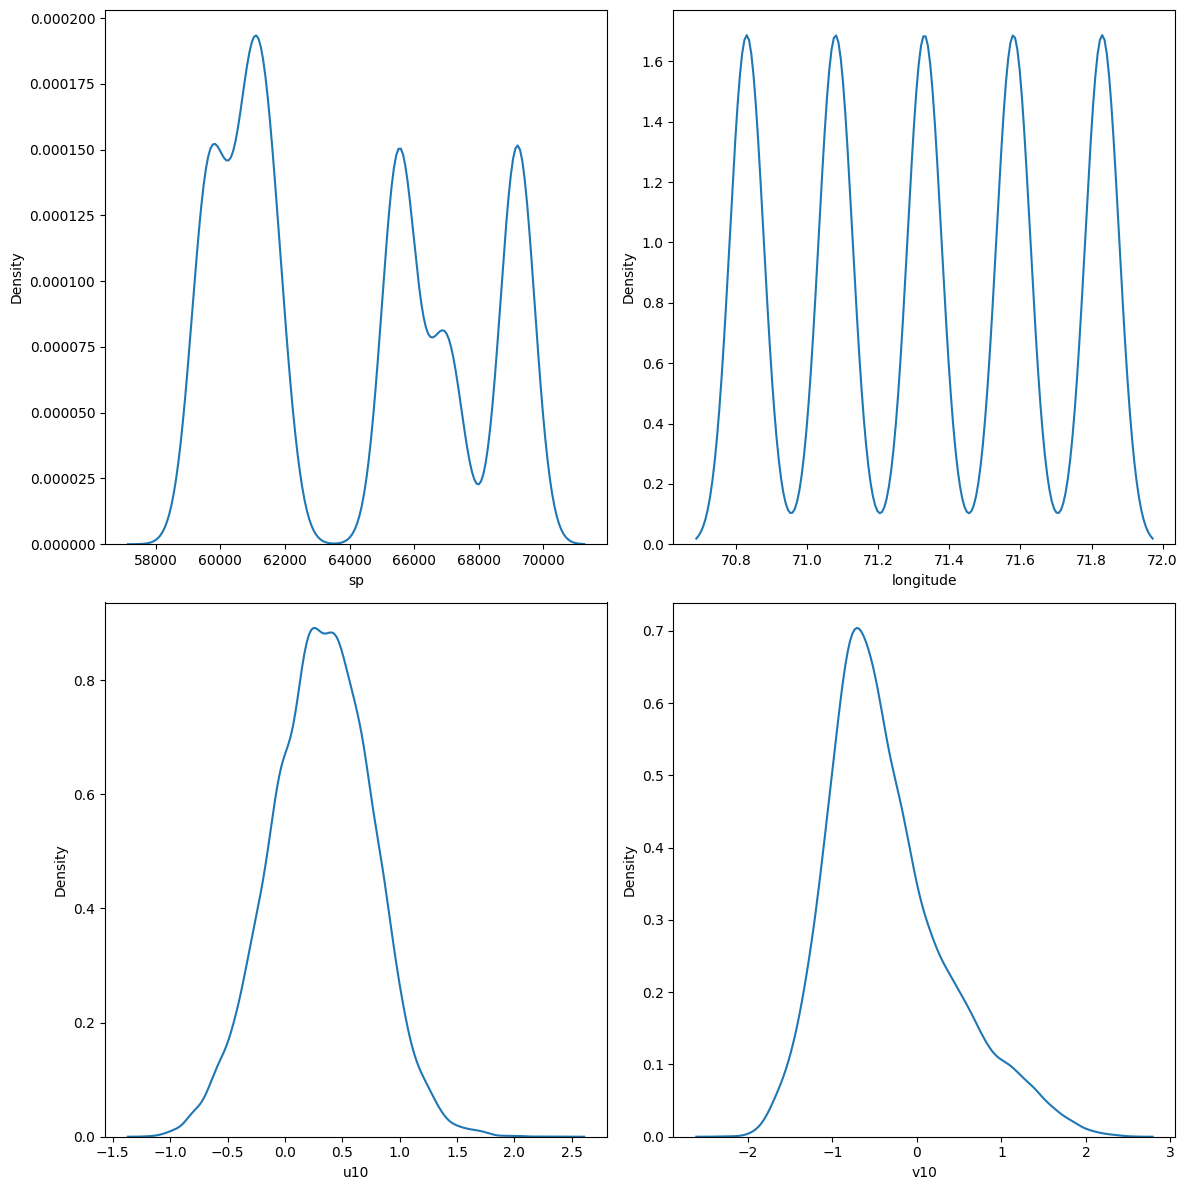

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 grid (4 subplots)
axs = axs.flatten()  # Flatten to 1D for easier access

# Your kdeplot calls:
sns.kdeplot(x=df["sp"], ax=axs[0])
sns.kdeplot(x=df["longitude"], ax=axs[1])
sns.kdeplot(x=df["u10"], ax=axs[2])
sns.kdeplot(x=df["v10"], ax=axs[3])

plt.tight_layout()  # Prevent overlapping
plt.show()

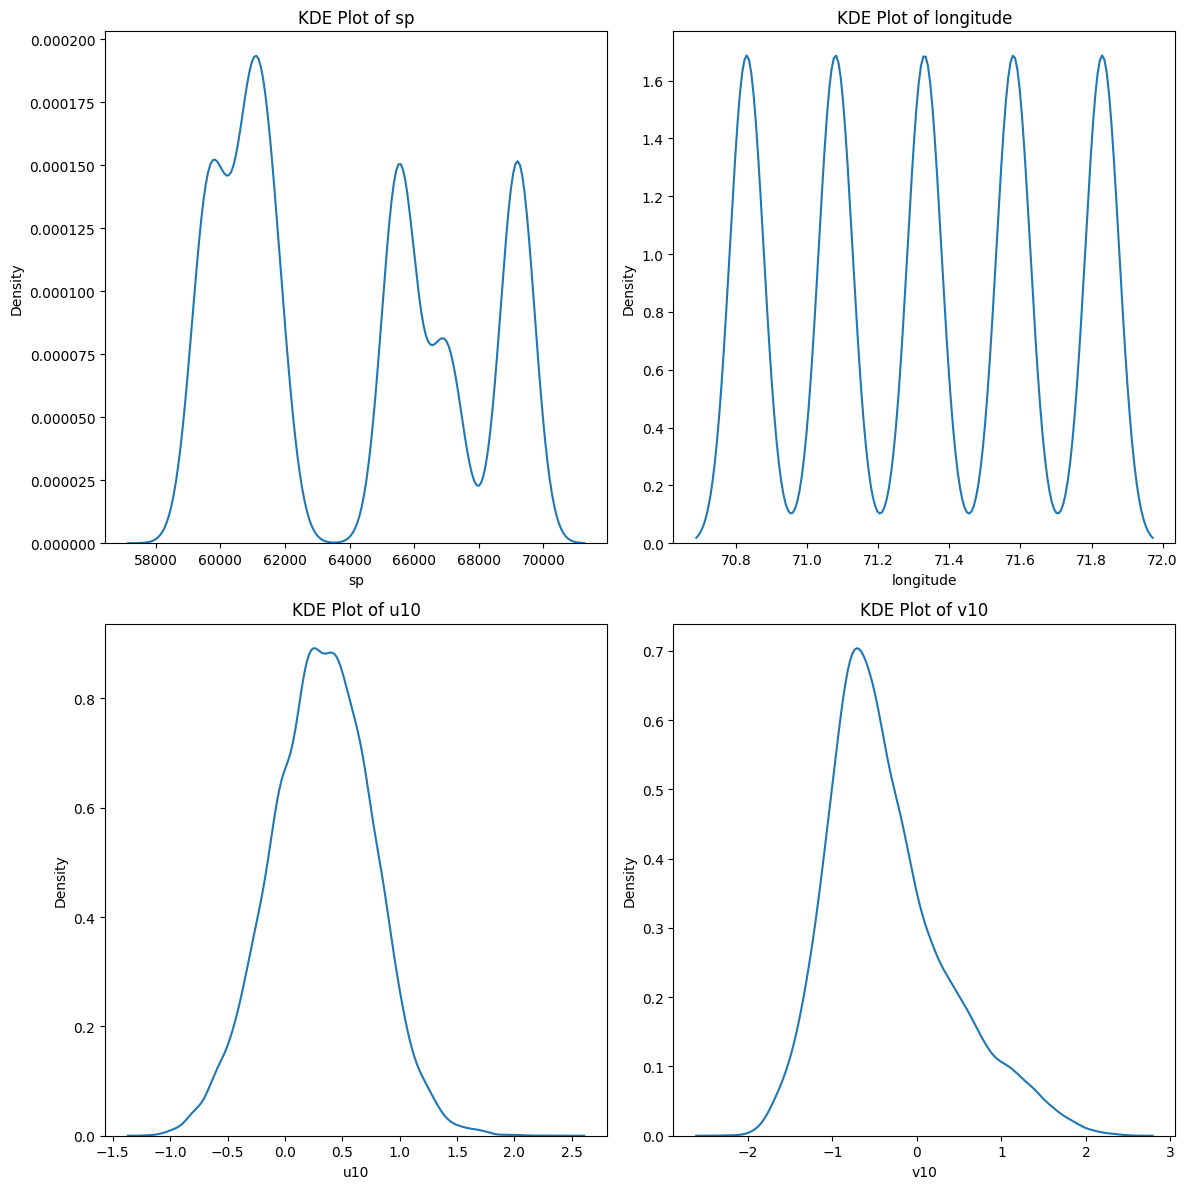

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has columns: 'sp', 'longitude', 'u10', 'v10'
cols_to_plot = ['sp', 'longitude', 'u10', 'v10']

fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns
axs = axs.flatten()  # Flatten to a 1D array for easier iteration

for i, col in enumerate(cols_to_plot):
    sns.kdeplot(x=df[col], ax=axs[i])
    axs[i].set_title(f'KDE Plot of {col}')  # Add titles for clarity

plt.tight_layout()
plt.show()

In [28]:
# Assuming your dataset has columns: 'sp', 'longitude', 'u10', 'v10'
# Replace these with your actual column names if they are different

# Value counts for 'sp' column (replace with your target variable column name)
print(df["sp"].value_counts())

# Check for missing values in all columns
print(df.isnull().sum())

sp
69291.660    3
59457.105    3
65623.670    3
69037.610    3
60952.805    3
            ..
59287.516    1
66795.016    1
65478.266    1
61486.016    1
69469.550    1
Name: count, Length: 22980, dtype: int64
longitude    0
u10          0
v10          0
sp           0
sp_bins      0
dtype: int64


In [29]:
df['sp'].fillna('20', inplace=True)

<ipython-input-29-9c27e36bffe5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sp'].fillna('20', inplace=True)


In [30]:
df.isnull().sum()

,0
longitude,0
u10,0
v10,0
sp,0
sp_bins,0


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sp_encoded"] = le.fit_transform(df["sp"])  # Create a new encoded column

In [32]:
df["sp_encoded"].value_counts()


,count
sp_encoded,
21469,3
1026,3
14547,3
19505,3
6675,3
...,...
410,1
16528,1
13436,1


In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'sp' column (target variable)
df['sp_encoded'] = le.fit_transform(df['sp'])

# Now define x and y
x = df[['longitude', 'u10', 'v10']]  # Features
y = df['sp_encoded']  # Encoded target variable

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [36]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [37]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [38]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred,average = None))
print(recall_score(y_test,y_pred,average= None))

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred,average = None))
print(recall_score(y_test,y_pred,average= None))

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
import pandas as pd

# Input data for prediction (using the same features as during training)
h = pd.DataFrame([[-2.866667, -7.027778, 0.93]], columns=['longitude', 'u10', 'v10'])

# Make the prediction
predicted_class = bnb.predict(h)[0]

print(f"Predicted class: {predicted_class}")

Predicted class: 5705


In [42]:
original_class = le.inverse_transform([predicted_class])[0]  # le is your LabelEncoder instance
print(f"Original predicted class: {original_class}")

Original predicted class: 60821.066


In [43]:
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for loading data, training, etc.) ...

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'sp' column (target variable)
df['sp_encoded'] = le.fit_transform(df['sp'])

# ... (rest of your code, including prediction) ...

# Get the original class label
original_class = le.inverse_transform([predicted_class])[0]
print(f"Original predicted class: {original_class}")

Original predicted class: 60821.066


In [44]:
import pandas as pd

# Input data for prediction (using the same features as during training)
h = pd.DataFrame([[-2.866667, -7.027778, 0.93]], columns=['longitude', 'u10', 'v10'])

# Get prediction probabilities
probabilities = bnb.predict_proba(h)

# Print the probabilities for each class
for i, probability in enumerate(probabilities[0]):
    print(f"Class {bnb.classes_[i]}: {probability * 100:.2f}%")

# Get the predicted class
predicted_class = bnb.predict(h)[0]
print(f"\nPredicted class: {predicted_class}")

Streaming output truncated to the last 5000 lines.
Class 16730: 0.00%
Class 16731: 0.00%
Class 16732: 0.01%
Class 16733: 0.00%
Class 16734: 0.00%
Class 16735: 0.00%
Class 16736: 0.00%
Class 16737: 0.00%
Class 16739: 0.00%
Class 16740: 0.01%
Class 16741: 0.01%
Class 16744: 0.00%
Class 16745: 0.00%
Class 16746: 0.00%
Class 16747: 0.01%
Class 16748: 0.00%
Class 16750: 0.00%
Class 16752: 0.01%
Class 16755: 0.01%
Class 16756: 0.00%
Class 16757: 0.00%
Class 16758: 0.00%
Class 16759: 0.01%
Class 16760: 0.00%
Class 16761: 0.00%
Class 16762: 0.00%
Class 16763: 0.01%
Class 16766: 0.01%
Class 16767: 0.00%
Class 16769: 0.01%
Class 16770: 0.00%
Class 16771: 0.01%
Class 16772: 0.01%
Class 16773: 0.01%
Class 16774: 0.00%
Class 16775: 0.00%
Class 16776: 0.01%
Class 16777: 0.00%
Class 16778: 0.00%
Class 16779: 0.00%
Class 16783: 0.00%
Class 16784: 0.01%
Class 16785: 0.01%
Class 16786: 0.00%
Class 16787: 0.00%
Class 16788: 0.01%
Class 16790: 0.00%
Class 16792: 0.01%
Class 16793: 0.00%
Class 16794: 0.00%

In [45]:
# ... (your code for loading data, training, etc.) ...

# Input data for prediction
h = pd.DataFrame([[-2.866667, -7.027778, 0.93]], columns=['longitude', 'u10', 'v10'])

# ... (get prediction probabilities and predicted class as above) ...

# Get the original class label (if you used Label Encoding for the target)
original_class = le.inverse_transform([predicted_class])[0]  # le is your LabelEncoder instance
print(f"Original predicted class: {original_class}")

Original predicted class: 60821.066


In [46]:
y = df["sp"]  # Select the 'sp' column as the target variable

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# ... (your code for loading data, etc.) ...

# Select features (x) and target (y)
x = df[['longitude', 'u10', 'v10']]
y = df["sp"]  # Select the 'sp' column as the target variable

# ... (rest of your code for training, prediction, etc.) ...

In [48]:
import pandas as pd
# ... (your code for loading data, training, etc.) ...

# Input data for prediction
h = pd.DataFrame([[-2.866667, -7.027778, 0.93]], columns=['longitude', 'u10', 'v10'])

# ... (rest of your code for prediction) ...

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer  # Import LabelBinarizer


# ... (your code for loading data) ...

# Define features (x) and target (y)
x = df[['longitude', 'u10', 'v10']]
y = df['sp']  # Assuming 'sp' is your target variable

# Discretize the target variable 'sp' into bins if it's continuous:
# For example, to create 5 bins:
df['sp_bins'] = pd.qcut(df['sp'], q=5, labels=False)
y = df['sp_bins']  # Use the binned target variable


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the BernoulliNB model
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

# Make predictions on the test set
y_pred = bnb.predict(x_test)

# Calculate the accuracy rate
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy rate
print(f"Accuracy Rate: {accuracy * 100:.2f}%")

Accuracy Rate: 26.04%
